Analysis of Data w.r.to time. 
During a time series analysis perform **trend decomposition** and f**orecast future **values. **Decomposition** allows to **visualize trends **in  data, to clearly explain their behavior. Finally, forecasting allows to anticipate future events that can aid in decision making. 

In [ ]:
import pandas as pd
import io
from google.colab import files
uploaded = files.upload()

In [3]:
import pandas as pd 
df = pd.read_csv("monthly-beer-production-in-austr.csv")
print(df.head())
df['Month'] = pd.to_datetime(df['Month'], format='%Y-%m')
print(df.head())
print(df.tail())

     Month  Monthly beer production
0  1956-01                     93.2
1  1956-02                     96.0
2  1956-03                     95.2
3  1956-04                     77.1
4  1956-05                     70.9
       Month  Monthly beer production
0 1956-01-01                     93.2
1 1956-02-01                     96.0
2 1956-03-01                     95.2
3 1956-04-01                     77.1
4 1956-05-01                     70.9
         Month  Monthly beer production
471 1995-04-01                    127.0
472 1995-05-01                    151.0
473 1995-06-01                    130.0
474 1995-07-01                    119.0
475 1995-08-01                    153.0


Text(0, 0.5, 'no of passengers')

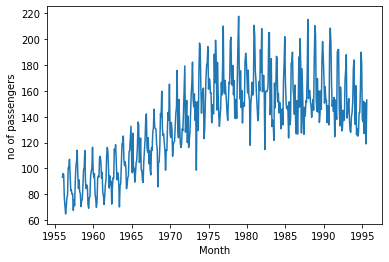

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns 

sns.lineplot(x=df['Month'],y=df['Monthly beer production'])
plt.ylabel("no of passengers")

In [5]:
df.index = df['Month']  #convert the month column to an index.
del df['Month']
print(df.head())

            Monthly beer production
Month                              
1956-01-01                     93.2
1956-02-01                     96.0
1956-03-01                     95.2
1956-04-01                     77.1
1956-05-01                     70.9


In [6]:
print(df.columns)

Index(['Monthly beer production'], dtype='object')


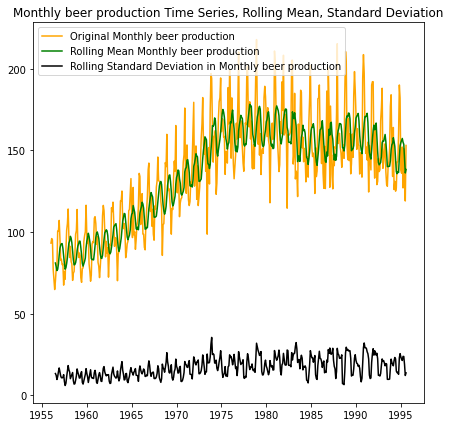

In [7]:
#calculate a seven-month rolling mean& std dev
rolling_mean = df.rolling(7).mean()
rolling_std = df.rolling(7).std()
plt.rcParams["figure.figsize"] = (7,7)
plt.plot(df, color="orange",label="Original Monthly beer production")
plt.plot(rolling_mean, color="green", label="Rolling Mean Monthly beer production")
plt.plot(rolling_std, color="black", label = "Rolling Standard Deviation in Monthly beer production")
plt.title("Monthly beer production Time Series, Rolling Mean, Standard Deviation")
plt.legend(loc="best")

Checking time series data for autocorrelation

In [8]:
autocorrelation_lag1 = df['Monthly beer production'].autocorr(lag=2)
print("One Month Lag: ", autocorrelation_lag1)

One Month Lag:  0.7385533376198373


Additive Model


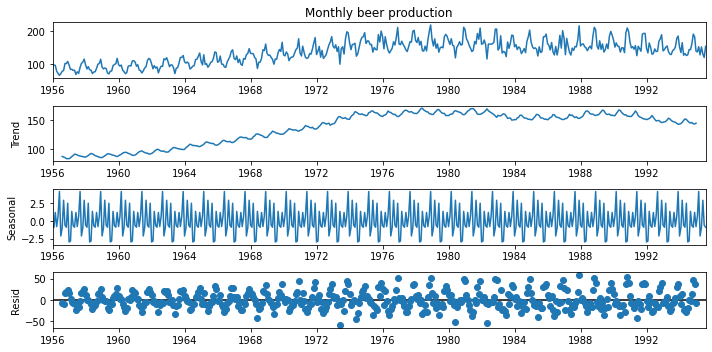

Multiplicative Model


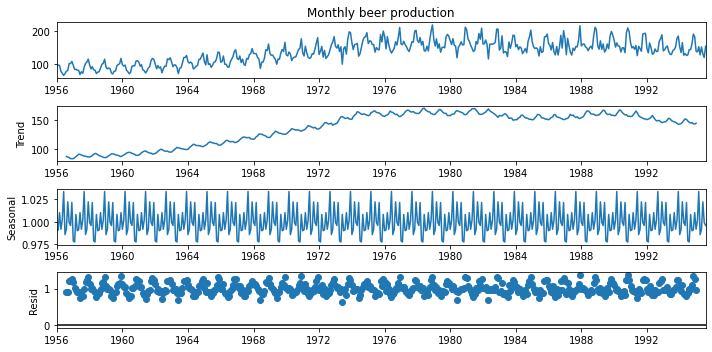

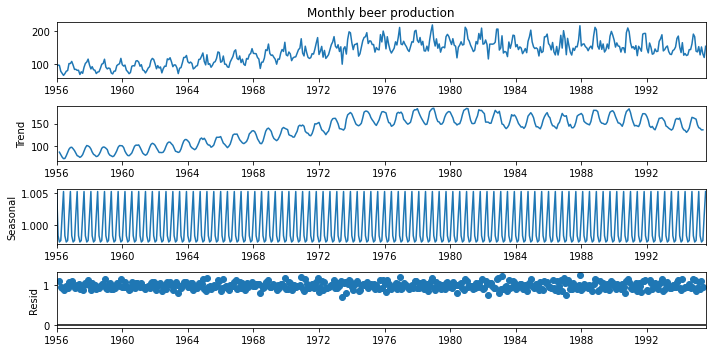

In [9]:
#Trend decomposition is another useful way to visualize the trends in time series data.
from statsmodels.tsa.seasonal import seasonal_decompose
print("Additive Model")
decompose = seasonal_decompose(df['Monthly beer production'],model='additive', period=15)
plt.rcParams["figure.figsize"] = (10,5)
decompose.plot()
plt.show()
print("Multiplicative Model")
decompose = seasonal_decompose(df['Monthly beer production'],model='multiplicative', period=15)
plt.rcParams["figure.figsize"] = (10,5)
decompose.plot()
plt.show()
decompose = seasonal_decompose(df['Monthly beer production'],model='multiplicative', period=5)
plt.rcParams["figure.figsize"] = (10,5)
decompose.plot()
plt.show()

Time series forecasting allows us to predict future values in a time series given current and past data. Here, we will use the ARIMA method to forecast the number of passengers, which allows us to forecast future values in terms of a linear combination of past values. 

<ipython-input-10-e3cf0021beab>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['train'] = train['Monthly beer production']
<ipython-input-10-e3cf0021beab>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['test'] = test['Monthly beer production']


            train
Month            
1956-01-01   93.2
1956-02-01   96.0
1956-03-01   95.2
1956-04-01   77.1
1956-05-01   70.9
...           ...
1992-05-01  129.0
1992-06-01  131.0
1992-07-01  145.0
1992-08-01  137.0
1992-09-01  138.0

[441 rows x 1 columns]


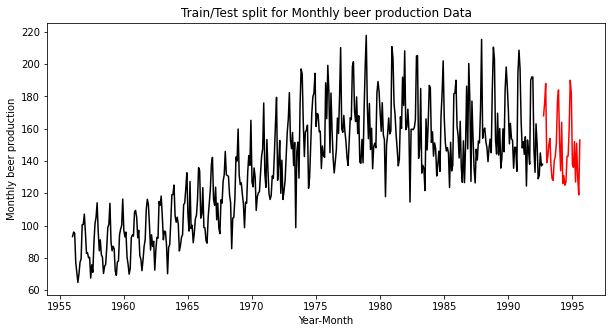

In [10]:
df['Date'] = df.index
train = df[df['Date'] < pd.to_datetime("1992-10", format='%Y-%m')]
train['train'] = train['Monthly beer production']
del train['Date']
del train['Monthly beer production']
print(train)
test = df[df['Date'] >= pd.to_datetime("1992-10", format='%Y-%m')]
del test['Date']
test['test'] = test['Monthly beer production']
del test['Monthly beer production']
plt.plot(train, color = "black")
plt.plot(test, color = "red")
plt.title("Train/Test split for Monthly beer production Data")
plt.ylabel("Monthly beer production")
plt.xlabel('Year-Month')
sns.set()
plt.show()

import auto_arima from the pdmarima package, train our model and generate predictions:

In [11]:
!pip install pmdarima

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.9 MB 5.2 MB/s 
     |████████████████████████████████| 9.9 MB 55.3 MB/s 
  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.12.2
    Uninstalling statsmodels-0.12.2:
      Successfully uninstalled statsmodels-0.12.2


In [1]:
!pip3 uninstall statsmodels
!pip3 install numpy scipy patsy pandas
!pip3 install statsmodels

Found existing installation: statsmodels 0.13.5
Uninstalling statsmodels-0.13.5:
  Would remove:
    /usr/local/lib/python3.8/dist-packages/statsmodels-0.13.5.dist-info/*
    /usr/local/lib/python3.8/dist-packages/statsmodels/*
Proceed (y/n)? y
  Successfully uninstalled statsmodels-0.13.5
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached statsmodels-0.13.5-cp38-cp38-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (9.9 MB)


In [11]:
from pmdarima.arima import auto_arima
model = auto_arima(train, trace=True, error_action='ignore', suppress_warnings=True)
model.fit(train)
forecast = model.predict(n_periods=len(test))
forecast = pd.DataFrame(forecast,index = test.index,columns=['Prediction'])

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=3755.238, Time=0.63 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=3867.903, Time=0.08 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=3845.076, Time=0.09 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=3835.976, Time=0.17 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=3865.915, Time=0.09 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=3822.548, Time=0.47 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=3825.802, Time=0.41 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=3755.733, Time=0.72 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=3756.618, Time=0.86 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=3759.940, Time=0.35 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=3763.412, Time=0.58 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=3827.560, Time=0.72 sec
 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=inf, Time=1.56 sec
 ARIMA(2,1,2)(0,0,0)[0]             : AIC=3757.678, Time=0.35 sec

Best model:  ARIMA(2,1,2)(0,0,0)[0] i

calculate root mean squared error (RMSE):

In [12]:
from math import sqrt
from sklearn.metrics import mean_squared_error
rms = sqrt(mean_squared_error(test,forecast))
print("RMSE: ", rms)

RMSE:  23.83634988852727


convert the month column into a datetime object. This will allow it to programmatically pull time values like the year or month for each record.

In [13]:
from datetime import datetime
df['Month']= pd.to_datetime(df.index, format='%d-%B')
# df['Month'] = list(map(lambda x: datetime.strptime(x,format('%d-%B')),df['Month']))
print(df.head())

            Monthly beer production       Date      Month
Month                                                    
1956-01-01                     93.2 1956-01-01 1956-01-01
1956-02-01                     96.0 1956-02-01 1956-02-01
1956-03-01                     95.2 1956-03-01 1956-03-01
1956-04-01                     77.1 1956-04-01 1956-04-01
1956-05-01                     70.9 1956-05-01 1956-05-01


In [14]:
df.index = df['Month']
del df['Month']
print(df.head())

            Monthly beer production       Date
Month                                         
1956-01-01                     93.2 1956-01-01
1956-02-01                     96.0 1956-02-01
1956-03-01                     95.2 1956-03-01
1956-04-01                     77.1 1956-04-01
1956-05-01                     70.9 1956-05-01


Text(0, 0.5, '1')

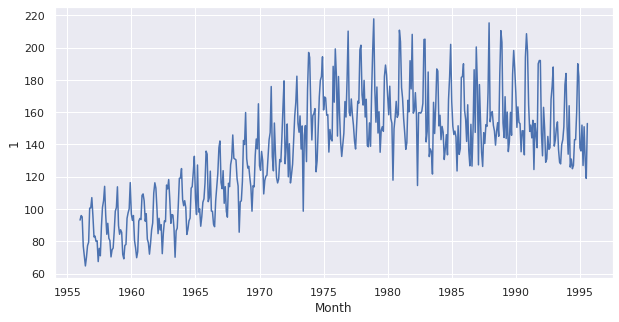

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns 
sns.lineplot(x=df.index,y=df['Monthly beer production'])
plt.ylabel(1)